In [ ]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

data42684


In [ ]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. All changes under this directory will be kept even after reset. Please clean unnecessary files in time to speed up environment loading.
!ls /home/aistudio/work

In [ ]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, you need to use the persistence path as the following:
!mkdir /home/aistudio/external-libraries
!pip install beautifulsoup4 -t /home/aistudio/external-libraries

Looking in indexes: https://pypi.mirrors.ustc.edu.cn/simple/
     |████████████████████████████████| 122kB 155kB/s eta 0:00:01


In [1]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可:
# Also add the following code, so that every time the environment (kernel) starts, just run the following code:
import sys
sys.path.append('/home/aistudio/external-libraries')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as mlp

In [3]:
train=pd.read_csv('data/data42684/train.csv')
test=pd.read_csv('data/data42684/test.csv')
songs=pd.read_csv('data/data42684/songs.csv')
song_extra_info=pd.read_csv('data/data42684/song_extra.csv')
members=pd.read_csv('data/data42684/members.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
target                int64
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 6 columns):
id                    int64
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
dtypes: int64(1), object(5)
memory usage: 117.0+ MB


In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
song_id        object
song_length    int64
genre_ids      object
artist_name    object
composer       object
lyricist       object
language       float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [ ]:
song_extra_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
song_id    object
name       object
isrc       object
dtypes: object(3)
memory usage: 52.6+ MB


In [ ]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
msno                      34403 non-null object
city                      34403 non-null int64
bd                        34403 non-null int64
gender                    14501 non-null object
registered_via            34403 non-null int64
registration_init_time    34403 non-null int64
expiration_date           34403 non-null int64
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [ ]:
members.describe()#年龄有异常值

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [ ]:
test.isnull().sum()

id                         0
msno                       0
song_id                    0
source_system_tab       8442
source_screen_name    162883
source_type             7297
dtype: int64

In [ ]:
members.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

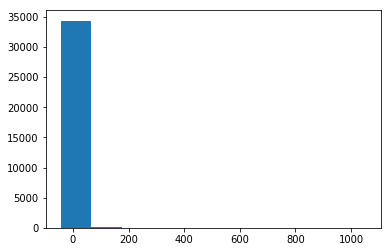

In [ ]:
mlp.hist(members['bd'], orientation = 'vertical',histtype = 'bar')
mlp.show()
# plt.hist(np.log(train['bd']), orientation = 'vertical',histtype = 'bar', color ='blue')
# plt.show()

In [ ]:
songs.isnull().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             1
dtype: int64

In [ ]:
songs[10:18]

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
10,HulM/OaHgD5kUyjNQjDUf8VZdsy7h4EJUIff79Cifwo=,272544,2157,D.L 羅時豐 (Daniel Lo),陳偉強,陳偉強,10.0
11,wypPzqFNdUJAqyBVxmFGaK4z7krUNWr5YqA0q0wi9eE=,254880,465,白安 (Ann),白安,白安,3.0
12,fAZLdfQaLG76a6Ei4alt1eSjBM9rshQkiQEC6+n+y08=,180871,726,Littlesong,Michael William Balfe,NaN,-1.0
13,tqBlH4r/q1Tf6C5+C6ucjGlLjMbfu5yjqB6ifRzy5dc=,257602,458,蔡旻佑 (Evan Yo),蔡旻佑,陳信延,3.0
14,an6EdIr+Z+KbqIVQiXn5PKkcXncefQ7hhWONseRuub4=,282697,359,Coldplay,Chris Martin| Guy Berryman| Jonny Buckland| Mi...,NaN,52.0
15,J2MFmy8iF94mExWfRWE3KxsMZB+ZIedV5liqZoSrERQ=,221518,359,Maggie Rogers,Maggie Rogers| Nicholas Das,NaN,52.0
16,MrRilXQwoUAcoAf0N3RT82qX2/us/wEhYDXE+ZTIW5o=,199157,458,小男孩樂團 (Men Envy Children),"Skot Suyama陶山/""蔡詩蕓 Dominique Tsai""",程懷昌 Vince Cheng,3.0
17,OcG4Ya7iXmVMCMy24C5wxDMtr9w6WQZiFaN0uq6zdTk=,169430,465,BIGBANG,TAEYANG| TEDDY,G-DRAGON| T.O.P| TEDDY,3.0


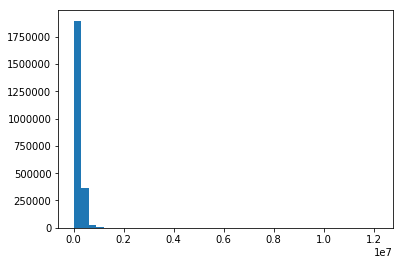

In [ ]:
mlp.hist(songs['song_length'],orientation='vertical',histtype='bar',bins=40)#歌曲长度有的太长
mlp.show()

In [ ]:
songs.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [ ]:
songs[songs['song_length']==1.217385e+07]

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
778210,DCdid/1HvuvKitGXNUg+R89Z9T7bHQquDeUra4fBzZU=,12173850,940,Jason Stephenson,Jason Stephenson,NaN,-1.0


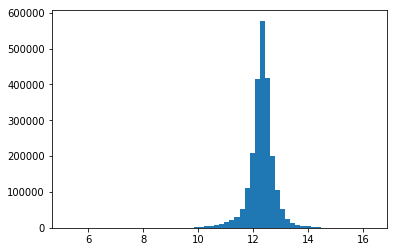

In [ ]:
mlp.hist(np.log(songs['song_length']),orientation='vertical',histtype='bar',bins=60)#歌曲长度有的太长
mlp.show()

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


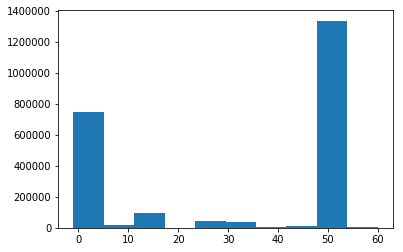

In [ ]:
mlp.hist(songs['language'],orientation='vertical',histtype='bar',range=[-1,60])
mlp.show()

In [ ]:
train.isnull().sum()

msno                       0
song_id                    0
source_system_tab      24849
source_screen_name    414804
source_type            21539
target                     0
dtype: int64

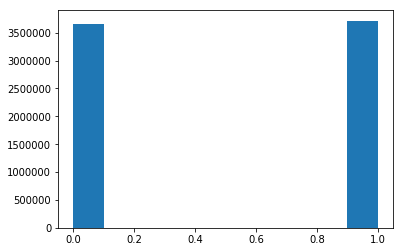

In [ ]:
mlp.hist(train['target'],orientation='vertical',histtype='bar',range=[0,1])
mlp.show()

In [ ]:
mlp.hist(train['source_system_tab'],orientation='vertical',histtype='bar')
mlp.show()

In [ ]:
mlp.hist(train['source_screen_name'],orientation='vertical',histtype='bar')
mlp.show()

In [ ]:
mlp.hist(train['source_type'],orientation='vertical',histtype='bar')
mlp.show()

In [7]:
def remove(df,cols_str):
    for s_id in df[cols_str]:
        if s_id not in (str(train[cols_str]) and str(test[cols_str])):
            df.drop(df[df[cols_str]==s_id].index)

In [5]:
remove(songs,'song_id')

In [6]:
remove(song_extra_info,'song_id')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 